# 모델 만들기2

## 데이터 셋 변경
- feature(X) : Gender, Height
- target(y( : Weight

- Gender는 범주형 데이터임 : One Hot Encoding으로 변환하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 데이터 로딩

In [4]:
# read weight-height dataset
data = "ml_datas/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
# 키 변경하기
gwh_df['Height'] = gwh_df['Height'] * 2.54

In [6]:
gwh_df['Height'] = round(gwh_df['Height'], 1)
gwh_df

,Gender,Height,Weight
0,Male,187.6,241.893563
1,Male,174.7,162.310473
2,Male,188.2,212.740856
3,Male,182.2,220.042470
4,Male,177.5,206.349801
...,...,...,...
9995,Female,168.1,136.777454
9996,Female,170.4,170.867906
9997,Female,162.2,128.475319
9998,Female,175.3,163.852461


In [7]:
gwh_df["Weight"] = round(gwh_df["Weight"] * 0.4563, 1)

In [8]:
gwh_df.head()

,Gender,Height,Weight
0,Male,187.6,110.4
1,Male,174.7,74.1
2,Male,188.2,97.1
3,Male,182.2,100.4
4,Male,177.5,94.2


### 데이터 분석

<Figure size 1000x600 with 0 Axes>

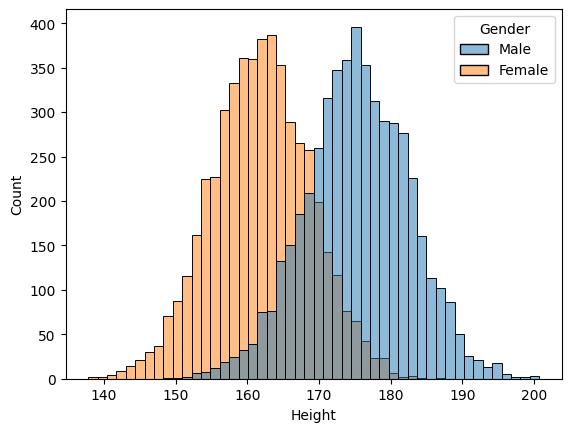

<Figure size 1000x600 with 0 Axes>

In [9]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

### 데이터 전처리

#### feature Engineering
- 문자형 데이터 숫자로 변환 : One Hot Encoding

In [10]:
# Gender 컬럼을 one hot encoding으로 변환하기
# mapping = {
#     "Male" : 0,
#     "Female" : 1
#           }

# df_OHE = gwh_df["Gender"].map(mapping)
# df_OHE

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Gender, Length: 10000, dtype: int64

In [15]:
gwh_df = pd.get_dummies(gwh_df)

In [16]:
# X = Gender, Height, y = Weight
X = gwh_df.drop("Weight", axis=1)
y = gwh_df["Weight"]

In [17]:
X

,Height,Gender_Female,Gender_Male
0,187.6,False,True
1,174.7,False,True
2,188.2,False,True
3,182.2,False,True
4,177.5,False,True
...,...,...,...
9995,168.1,True,False
9996,170.4,True,False
9997,162.2,True,False
9998,175.3,True,False


### feature / target 분리

In [18]:
# train data / test 데이터로 분할
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=20)

In [19]:
train_X

,Height,Gender_Female,Gender_Male
4661,175.6,False,True
7168,163.2,True,False
1031,176.0,False,True
6746,157.6,True,False
9228,161.5,True,False
...,...,...,...
3915,171.8,False,True
9620,170.0,True,False
7068,164.2,True,False
7391,161.3,True,False


### 모델 객체 생성

In [21]:
# 학습모델 객체생성, 학습, 테스트
model_lr = LinearRegression()
model_lr

LinearRegression()

### 학습

In [23]:
# 학습
model_lr.fit(train_X, train_y)

LinearRegression()

### 테스트

In [24]:
y_pred = model_lr.predict(test_X)
y_pred

array([59.82229793, 98.16446973, 72.5667016 , ..., 57.25181075,
       61.42885241, 74.92298151])

In [33]:
test_data = pd.DataFrame({"Height":[160],
                          "Gender_Female": True,
                         "Gender_Male" : False})

In [34]:
model_lr.predict(test_data)

array([60.03650519])

In [39]:
my_test = pd.DataFrame({"Height":[160, 176],
                          "Gender_Female": [1, 0],
                         "Gender_Male" : [0, 1]})
my_test

,Height,Gender_Female,Gender_Male
0,160,1,0
1,176,0,1


In [40]:
model_lr.predict(my_test)

array([60.03650519, 86.06175927])

In [41]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(test_y, y_pred)

In [42]:
# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

In [43]:
print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 21.04221321678508
RMSE : 4.587179222221983


In [45]:
train_X[:5]

,Height,Gender_Female,Gender_Male
4661,175.6,False,True
7168,163.2,True,False
1031,176.0,False,True
6746,157.6,True,False
9228,161.5,True,False


In [46]:
test_X[:5]

,Height,Gender_Female,Gender_Male
9957,159.8,True,False
1687,187.3,False,True
2116,163.4,False,True
231,182.8,False,True
2780,172.2,False,True


In [57]:
test_y[:5]

9957    65.7
1687    93.1
2116    80.2
231     92.0
2780    75.0
Name: Weight, dtype: float64

### 데이터 시각화

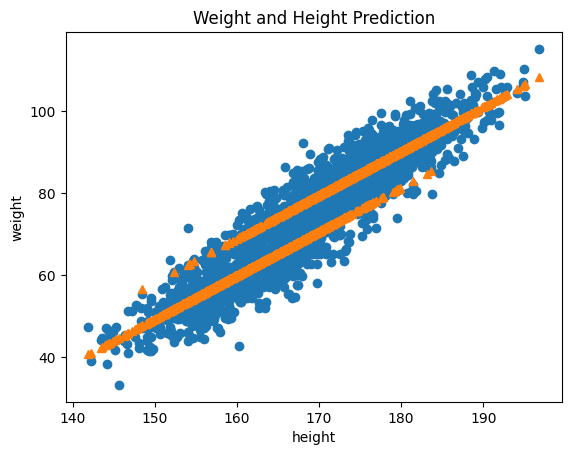

In [63]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
# 마크 모양 : '0', '^' 사용함
plt.plot(test_X["Height"], test_y, "o")
plt.plot(test_X["Height"], y_pred, "^")


plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()